In [1]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec

In [2]:
plt.style.use('default')
plt.rc('text', usetex=True)

plt.rcParams['font.size']=17.5
plt.rcParams['font.family']='Arial'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['xtick.major.size']=7
plt.rcParams['xtick.minor.size']=4
plt.rcParams['ytick.major.size']=7
plt.rcParams['xtick.minor.size']=4

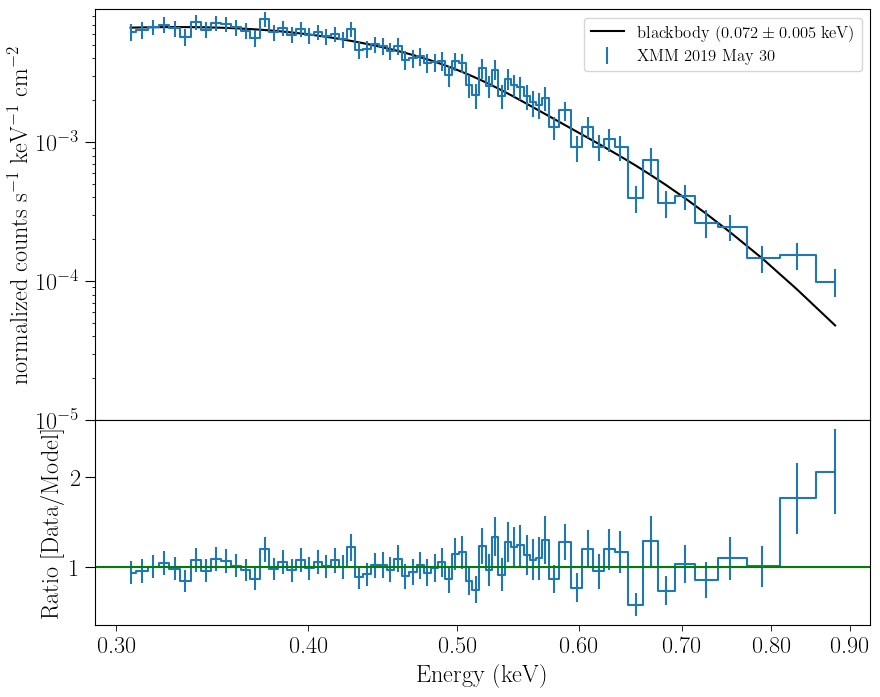

In [3]:
def plot_xmm(fdata,path='./data/',
                    model_label=None,#'blackbody+power law'
                    m1_label=None,#r'power law ($\Gamma=#\pm#$)', 
                    m2_label=None,#r'blackbody ($#\pm#$ keV)',
                    data_label='XMM',obsid=None):
    name=fdata.split('_')[0]
    if not obsid: obsid=fdata.split('_')[-1].split('.')[0]
    f, axarr = plt.subplots(2, 1, figsize=(10,8), sharex='col')

    # set height ratios for sublots
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

    # the first subplot
    ax0 = plt.subplot(gs[0])

    ax1 = plt.subplot(gs[1], sharex = ax0)

    plt.subplots_adjust(hspace=0)

    col_names=['x','xerr','y','yerr','back','berr','model','m1','m2']
    data=pd.read_csv(path+fdata,sep=' ',skiprows=3,index_col=False,names=col_names)#header=None)
    break_index=data.index[data.iloc[:,0]=='NO'][0] #28
    df=data[:break_index].astype(float)
    rf=data[break_index+1:]
    break_index=df.columns.get_loc(rf.iloc[0].index[rf.iloc[0]=='NO'][0]) #4
    rf=rf.iloc[:,:break_index].astype(float)



    ax0.errorbar(np.array(df['x']),np.array(df['y']),label=data_label,yerr=np.array(df['yerr']),fmt='none')
    ax0.step(np.array(df['x']),np.array(df['y']), where='mid',color='C0')
    
    if 'uf' in obsid or 'abs' in obsid:
        ax0.plot(np.array(df['x']),np.array(df['back']),label=model_label,color='k',zorder=0)
    else:
        ax0.errorbar(np.array(df['x']),np.array(df['back']),xerr=np.array(df['xerr']),yerr=np.array(df['berr']),fmt='none')
        ax0.scatter(np.array(df['x']),np.array(df['back']),label='Background',marker='x',color='C1')

        ax0.plot(np.array(df['x']),np.array(df['model']),color='k',label=model_label,zorder=0)
        ax0.plot(np.array(df['x']),np.array(df['m1']),':',label=m1_label)
        ax0.plot(np.array(df['x']),np.array(df['m2']),'--',label=m2_label)#T_{\rm{bb}}=
    ax0.set_ylim(1e-7)
    ax0.set_yscale('log')
    ax0.set_xscale('log')
    if 'uf' in obsid:
        ax0.set_ylabel(r'Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$')
    else:
        ax0.set_ylabel(r'normalized counts s$^{-1}$ keV$^{-1}$ cm$^{-2}$')
    ax0.legend()


    ax1.errorbar(np.array(rf['x']),np.array(rf['y']),yerr=np.array(rf['yerr']),fmt='none')
    ax1.step(np.array(rf['x']),np.array(rf['y']),where='mid',color='C0')

    ax1.axhline(y=1,color='g')
    ax0.set_ylim(1e-5)
    
    if 'raven' in name and 'diskbb' in fdata:
        ax0.set_ylim(5e-5)
    ax1.set_xscale('log')
    ax1.set_ylabel(r'Ratio [Data/Model]')
    ax1.set_xlabel(r'Energy (keV)')
    ax1.xaxis.set_major_formatter(ScalarFormatter()) #so that xlabels are 1,10,100...
    ax1.xaxis.set_minor_formatter(mtick.FormatStrFormatter('%.2f')) #so that xlabels are not scientific notation

    savefile="plots/extended_data_figure_5_xmm_spectrum.pdf"

    plt.savefig(savefile,bbox_inches='tight')
    plt.show()
    
plot_xmm(fdata='AT2019dsg_diskbb_zph.qdp',
                model_label='blackbody ($0.072\pm0.005$ keV)',
                obsid='0842590901_abs',
                data_label='XMM 2019 May 30')
